<a href="https://colab.research.google.com/github/Tonry12/Data_joyx2/blob/main/Lottery_Prediction_model_LSTM_(-1)(100)(0.01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PrepareDATA

Link: https://medium.com/@polanitzer/forecasting-the-next-winning-numbers-in-the-texas-lottery-mega-millions-drawing-using-a-deep-4c37ee6d30f0

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lotto = pd.read_csv('/content/drive/MyDrive/SPN/Predictive lottery 30_9 19 2024.csv')

In [ ]:
lotto = lotto.drop(columns=['Date','Unnamed: 1','Unnamed: 2','Unnamed: 3'])

In [ ]:
lotto

,DATE,รางวัลที่ 1,2 ตัวบน,3 ตัวบน,2 ตัวล่าง,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,9/16/2024,608662,62,662,37,NaN,NaN,NaN,NaN,NaN,NaN
1,9/1/2024,199606,6,606,94,NaN,NaN,NaN,NaN,NaN,NaN
2,8/16/2024,95867,67,867,28,NaN,NaN,NaN,NaN,NaN,NaN
3,8/1/2024,407041,41,41,46,NaN,NaN,NaN,NaN,NaN,NaN
4,7/16/2024,367336,36,336,21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
725,5/16/1994,2071764,64,764,29,93.0,544.0,535.0,746.0,2.0,Monday
726,5/2/1994,3072877,77,877,69,535.0,317.0,170.0,521.0,2.0,Monday
727,4/16/1994,7893913,13,913,21,785.0,982.0,151.0,594.0,7.0,Saturday
728,4/1/1994,4269815,15,815,29,675.0,35.0,704.0,868.0,6.0,Friday


In [ ]:
lotto.rename(columns={'DATE': 'Date','รางวัลที่ 1': '1st','3 ตัวบน':'top3','2 ตัวล่าง':'up2'},inplace=True)

In [ ]:
lotto

,Date,1st,2 ตัวบน,top3,up2,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,9/16/2024,608662,62,662,37,NaN,NaN,NaN,NaN,NaN,NaN
1,9/1/2024,199606,6,606,94,NaN,NaN,NaN,NaN,NaN,NaN
2,8/16/2024,95867,67,867,28,NaN,NaN,NaN,NaN,NaN,NaN
3,8/1/2024,407041,41,41,46,NaN,NaN,NaN,NaN,NaN,NaN
4,7/16/2024,367336,36,336,21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
725,5/16/1994,2071764,64,764,29,93.0,544.0,535.0,746.0,2.0,Monday
726,5/2/1994,3072877,77,877,69,535.0,317.0,170.0,521.0,2.0,Monday
727,4/16/1994,7893913,13,913,21,785.0,982.0,151.0,594.0,7.0,Saturday
728,4/1/1994,4269815,15,815,29,675.0,35.0,704.0,868.0,6.0,Friday


In [ ]:
ls= lotto.iloc[:,9:11]

In [ ]:
lu= lotto.iloc[:,0:5]

In [ ]:
lt = pd.concat([lu, ls], axis=1)

In [ ]:
lt

,Date,1st,2 ตัวบน,top3,up2,weekday_dum,weekday
0,9/16/2024,608662,62,662,37,NaN,NaN
1,9/1/2024,199606,6,606,94,NaN,NaN
2,8/16/2024,95867,67,867,28,NaN,NaN
3,8/1/2024,407041,41,41,46,NaN,NaN
4,7/16/2024,367336,36,336,21,NaN,NaN
...,...,...,...,...,...,...,...
725,5/16/1994,2071764,64,764,29,2.0,Monday
726,5/2/1994,3072877,77,877,69,2.0,Monday
727,4/16/1994,7893913,13,913,21,7.0,Saturday
728,4/1/1994,4269815,15,815,29,6.0,Friday


In [ ]:
lt = lt.drop(columns=['2 ตัวบน'])

In [ ]:
more = lt[lt['1st'] >= 999999]
more.count()

,0
Date,20
1st,20
top3,20
up2,20
weekday_dum,20
weekday,20


In [ ]:
lt = lt[lt['1st'] <= 999999]

In [ ]:
lt['up2'] = lt['up2'].apply(lambda x: '{:02}'.format(x))

In [ ]:
lt['top3'] = lt['top3'].apply(lambda x: '{:03}'.format(x))

In [ ]:
lt['Date'] = pd.to_datetime(lt['Date'])

In [ ]:
lt['Year'] = pd.to_datetime(lt['Date']).dt.year
lt['Month'] = pd.to_datetime(lt['Date']).dt.month
lt['Day'] = pd.to_datetime(lt['Date']).dt.day

In [ ]:
lt_1 = lt.copy()

In [ ]:
lt_1['up2'] = lt_1['up2'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['Tens digit'] = lt_1['up2'].apply(lambda x: int(x[0]))
lt_1['Units digit'] = lt_1['up2'].apply(lambda x: int(x[1]) if len(x) > 1 else 0)

In [ ]:
lt_1['top3'] = lt_1['top3'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['c3_r1'] = lt_1['top3'].apply(lambda x: int(x[0]))
lt_1['c3_r2'] = lt_1['top3'].apply(lambda x: int(x[1]))
lt_1['c3_r3'] = lt_1['top3'].apply(lambda x: int(x[2]))

In [ ]:
lt_2 = lt_1.copy()

# LSTM Model

In [ ]:
lt_2

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-09-16,608662,662,37,NaN,NaN,2024,9,16,3,7,6,6,2
1,2024-09-01,199606,606,94,NaN,NaN,2024,9,1,9,4,6,0,6
2,2024-08-16,95867,867,28,NaN,NaN,2024,8,16,2,8,8,6,7
3,2024-08-01,407041,041,46,NaN,NaN,2024,8,1,4,6,0,4,1
4,2024-07-16,367336,336,21,NaN,NaN,2024,7,16,2,1,3,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1995-03-16,646847,847,67,5.0,Thursday,1995,3,16,6,7,8,4,7
706,1995-03-01,411454,454,71,4.0,Wednesday,1995,3,1,7,1,4,5,4
707,1995-02-16,869070,070,95,5.0,Thursday,1995,2,16,9,5,0,7,0
708,1995-02-01,198162,162,48,4.0,Wednesday,1995,2,1,4,8,1,6,2


In [ ]:
sh = lt_2.shape

In [ ]:
z = 1

In [ ]:
lt_3 = lt_2.iloc[z:sh[0], 0:sh[1]]

In [ ]:
lt_3

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
1,2024-09-01,199606,606,94,NaN,NaN,2024,9,1,9,4,6,0,6
2,2024-08-16,95867,867,28,NaN,NaN,2024,8,16,2,8,8,6,7
3,2024-08-01,407041,041,46,NaN,NaN,2024,8,1,4,6,0,4,1
4,2024-07-16,367336,336,21,NaN,NaN,2024,7,16,2,1,3,3,6
5,2024-07-01,434503,503,89,NaN,NaN,2024,7,1,8,9,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1995-03-16,646847,847,67,5.0,Thursday,1995,3,16,6,7,8,4,7
706,1995-03-01,411454,454,71,4.0,Wednesday,1995,3,1,7,1,4,5,4
707,1995-02-16,869070,070,95,5.0,Thursday,1995,2,16,9,5,0,7,0
708,1995-02-01,198162,162,48,4.0,Wednesday,1995,2,1,4,8,1,6,2


## ไม่ล่วงหน้า

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
dfp = lt_3.copy()

In [ ]:
df = dfp.reset_index()

In [ ]:
df

,index,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,1,2024-09-01,199606,606,94,NaN,NaN,2024,9,1,9,4,6,0,6
1,2,2024-08-16,95867,867,28,NaN,NaN,2024,8,16,2,8,8,6,7
2,3,2024-08-01,407041,041,46,NaN,NaN,2024,8,1,4,6,0,4,1
3,4,2024-07-16,367336,336,21,NaN,NaN,2024,7,16,2,1,3,3,6
4,5,2024-07-01,434503,503,89,NaN,NaN,2024,7,1,8,9,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,705,1995-03-16,646847,847,67,5.0,Thursday,1995,3,16,6,7,8,4,7
705,706,1995-03-01,411454,454,71,4.0,Wednesday,1995,3,1,7,1,4,5,4
706,707,1995-02-16,869070,070,95,5.0,Thursday,1995,2,16,9,5,0,7,0
707,708,1995-02-01,198162,162,48,4.0,Wednesday,1995,2,1,4,8,1,6,2


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
df2 = df.copy()

In [ ]:
df1 = df.copy()
df.drop(['index','Date','1st','weekday_dum','weekday','Year','Month','Day','Tens digit','Units digit','c3_r1','c3_r2','c3_r3'], axis=1, inplace=True)

number_of_features = df.shape[1]

In [ ]:
df

,top3,up2
0,606,94
1,867,28
2,041,46
3,336,21
4,503,89
...,...,...
704,847,67
705,454,71
706,070,95
707,162,48


In [ ]:
df1.drop(['index','1st','weekday_dum','weekday','Year','Month','Day','Tens digit','Units digit','c3_r1','c3_r2','c3_r3'], axis=1, inplace=True)

In [ ]:
df1

,Date,top3,up2
0,2024-09-01,606,94
1,2024-08-16,867,28
2,2024-08-01,041,46
3,2024-07-16,336,21
4,2024-07-01,503,89
...,...,...,...
704,1995-03-16,847,67
705,1995-03-01,454,71
706,1995-02-16,070,95
707,1995-02-01,162,48


In [ ]:
window_length = 7
window_length

7

In [ ]:
train = df.copy()
train.head((window_length+1))

,top3,up2
0,606,94
1,867,28
2,041,46
3,336,21
4,503,89
5,504,31
6,593,42
7,690,60


In [ ]:
train_rows = train.values.shape[0]
train_samples = np.empty([ train_rows - window_length, window_length, number_of_features], dtype=float)
train_labels = np.empty([ train_rows - window_length, number_of_features], dtype=float)
for i in range(0, train_rows-window_length):
    train_samples[i] = train.iloc[i : i+window_length, 0 : number_of_features]
    train_labels[i] = train.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [ ]:
train.values.shape[0]

709

In [ ]:
train_samples[0]

array([[606.,  94.],
       [867.,  28.],
       [ 41.,  46.],
       [336.,  21.],
       [503.,  89.],
       [504.,  31.],
       [593.,  42.]])

In [ ]:
train_labels[0]

array([690.,  60.])

In [ ]:
scaler = StandardScaler()
transformed_dataset = scaler.fit_transform(train.values)
scaled_train_samples = pd.DataFrame(data=transformed_dataset, index=train.index)

In [ ]:
scaled_train_samples.head(window_length+1)

,0,1
0,0.350836,1.459500
1,1.274044,-0.829005
2,-1.647680,-0.204867
3,-0.604207,-1.071725
4,-0.013495,1.286129
5,-0.009958,-0.724982
6,0.304852,-0.343564
7,0.647960,0.280573


In [ ]:
x_train = np.empty([ train_rows - window_length, window_length, number_of_features], dtype=float)
y_train = np.empty([ train_rows - window_length, number_of_features], dtype=float)

for i in range(0, train_rows-window_length):
    x_train[i] = scaled_train_samples.iloc[i : i+window_length, 0 : number_of_features]
    y_train[i] = scaled_train_samples.iloc[i+window_length : i+window_length+1, 0 : number_of_features]

In [ ]:
y_train

array([[ 0.3042291 , -0.34301334],
       [ 0.64750615,  0.28144685],
       [-1.38384465, -1.21031916],
       ...,
       [-1.54663583,  1.49567499],
       [-1.22105347, -0.13485995],
       [-0.42125333, -0.41239781]])

#old

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mse

In [ ]:
# Initialising the RNN
model = Sequential()
# Adding the input layer and the LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a first Dropout layer
model.add(Dropout(0.2))
# Adding a second LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a second Dropout layer
model.add(Dropout(0.2))
# Adding a third LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = True)))
# Adding a fourth LSTM layer
model.add(Bidirectional(LSTM(240,
                        input_shape = (window_length, number_of_features),
                        return_sequences = False)))
# Adding a third Dropout layer
model.add(Dropout(0.2))
# Adding the first output layer
model.add(Dense(70))
# Adding the last output layer
model.add(Dense(number_of_features))


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss ='mse', metrics=['accuracy'])

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=200, verbose=2)

Epoch 1/200
6/6 - 10s - 2s/step - accuracy: 0.4893 - loss: 1.0105
Epoch 2/200
6/6 - 0s - 28ms/step - accuracy: 0.4964 - loss: 1.0042
Epoch 3/200
6/6 - 0s - 25ms/step - accuracy: 0.5064 - loss: 1.0018
Epoch 4/200
6/6 - 0s - 22ms/step - accuracy: 0.5036 - loss: 1.0022
Epoch 5/200
6/6 - 0s - 23ms/step - accuracy: 0.5107 - loss: 1.0017
Epoch 6/200
6/6 - 0s - 22ms/step - accuracy: 0.5036 - loss: 0.9988
Epoch 7/200
6/6 - 0s - 23ms/step - accuracy: 0.5021 - loss: 1.0005
Epoch 8/200
6/6 - 0s - 23ms/step - accuracy: 0.5334 - loss: 1.0008
Epoch 9/200
6/6 - 0s - 23ms/step - accuracy: 0.5192 - loss: 1.0002
Epoch 10/200
6/6 - 0s - 23ms/step - accuracy: 0.5235 - loss: 1.0016
Epoch 11/200
6/6 - 0s - 23ms/step - accuracy: 0.4908 - loss: 1.0000
Epoch 12/200
6/6 - 0s - 23ms/step - accuracy: 0.5249 - loss: 0.9959
Epoch 13/200
6/6 - 0s - 22ms/step - accuracy: 0.5121 - loss: 1.0009
Epoch 14/200
6/6 - 0s - 22ms/step - accuracy: 0.5036 - loss: 0.9986
Epoch 15/200
6/6 - 0s - 23ms/step - accuracy: 0.5007 - los

# New

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [ ]:
fold = 10
L_REG = 0.001
pat = 100
epo = 150
learning = 0.005
DP = 0.05

Training fold 1...
Epoch 1/150
5/5 - 7s - 1s/step - accuracy: 0.5040 - loss: 1.9122 - val_accuracy: 0.4366 - val_loss: 1.5971 - learning_rate: 0.0050
Epoch 2/150
5/5 - 0s - 36ms/step - accuracy: 0.4929 - loss: 1.6289 - val_accuracy: 0.6479 - val_loss: 1.3754 - learning_rate: 0.0050
Epoch 3/150
5/5 - 0s - 35ms/step - accuracy: 0.5198 - loss: 1.4251 - val_accuracy: 0.4366 - val_loss: 1.2755 - learning_rate: 0.0050
Epoch 4/150
5/5 - 0s - 33ms/step - accuracy: 0.5309 - loss: 1.2778 - val_accuracy: 0.5493 - val_loss: 1.0975 - learning_rate: 0.0050
Epoch 5/150
5/5 - 0s - 32ms/step - accuracy: 0.5182 - loss: 1.1818 - val_accuracy: 0.4507 - val_loss: 1.0531 - learning_rate: 0.0050
Epoch 6/150
5/5 - 0s - 32ms/step - accuracy: 0.4913 - loss: 1.1311 - val_accuracy: 0.4930 - val_loss: 1.0302 - learning_rate: 0.0050
Epoch 7/150
5/5 - 0s - 33ms/step - accuracy: 0.5309 - loss: 1.0988 - val_accuracy: 0.5634 - val_loss: 0.9865 - learning_rate: 0.0050
Epoch 8/150
5/5 - 0s - 32ms/step - accuracy: 0.5055 

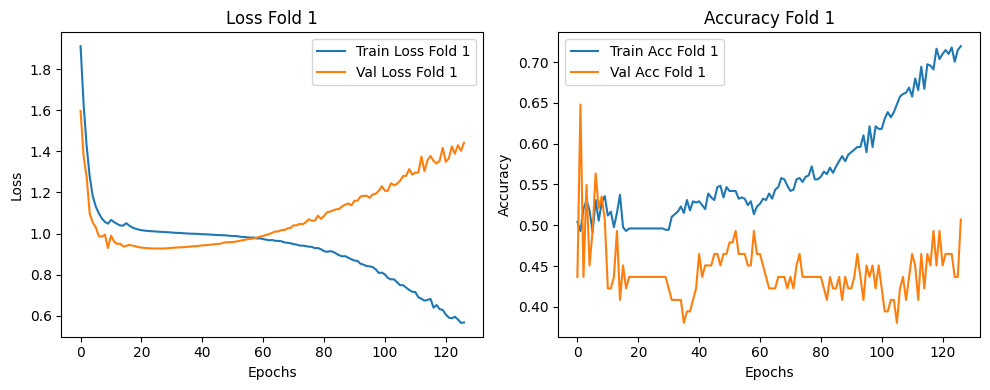

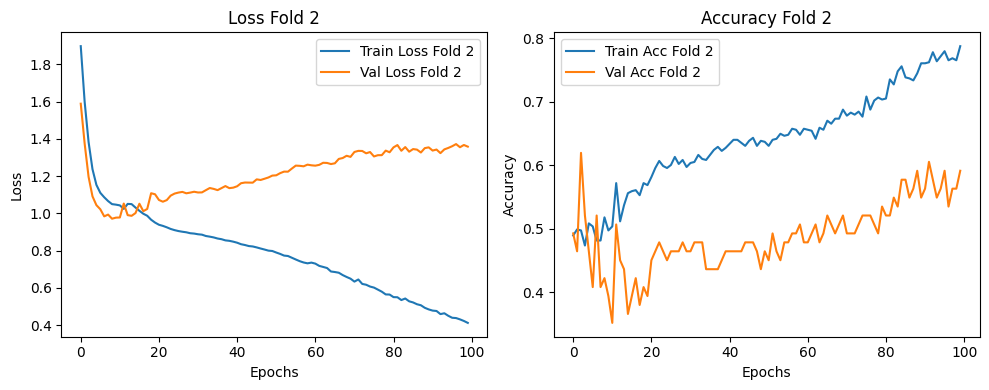

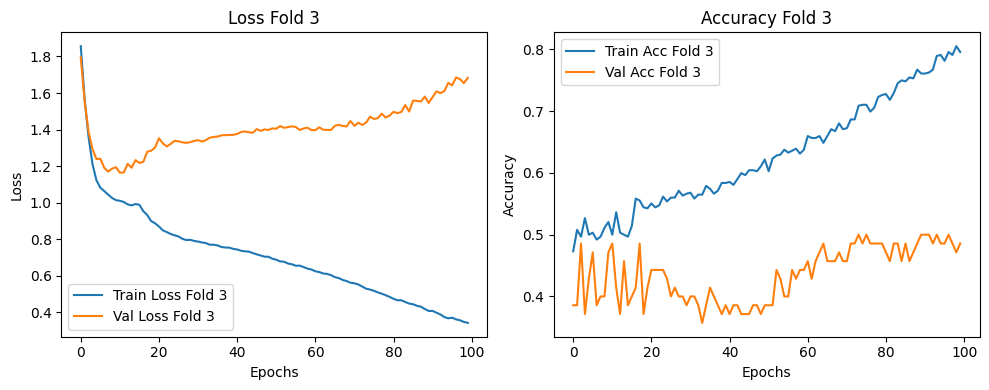

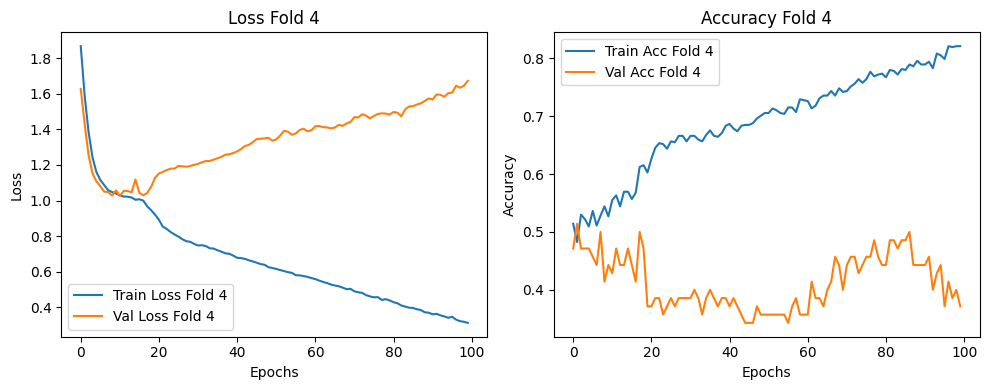

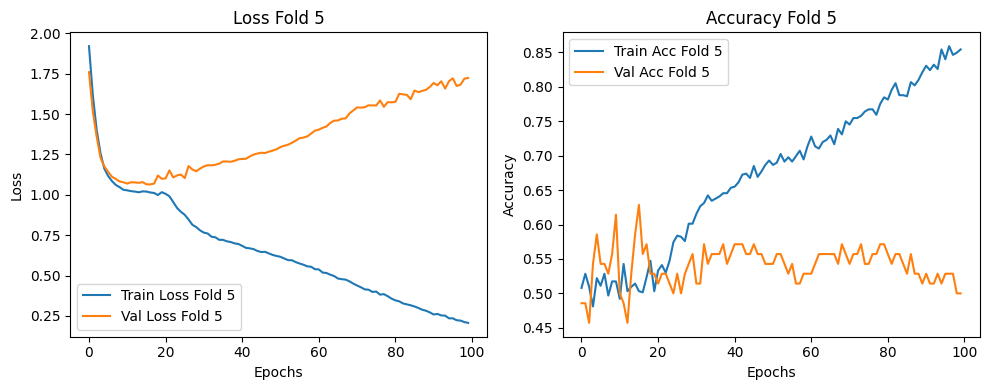

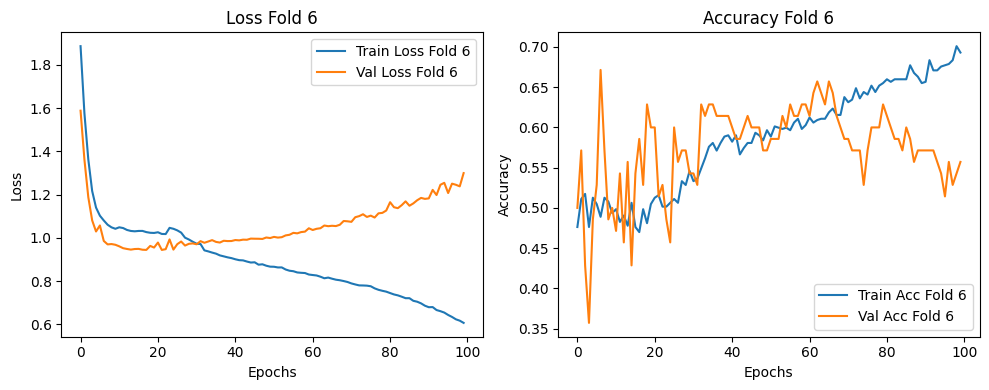

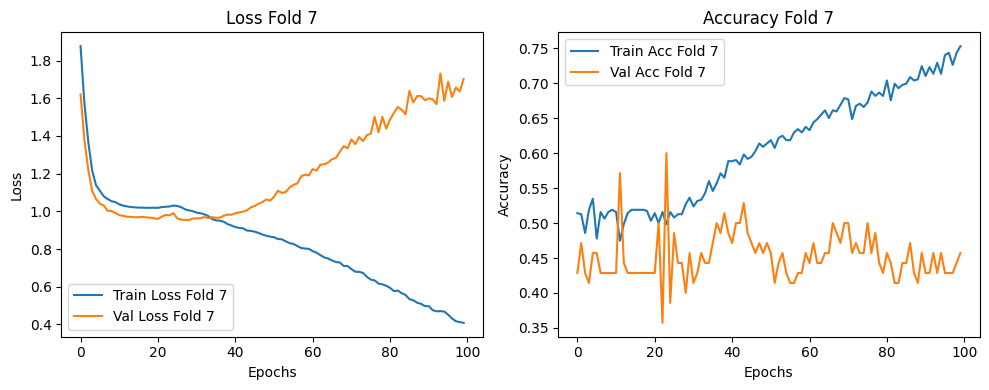

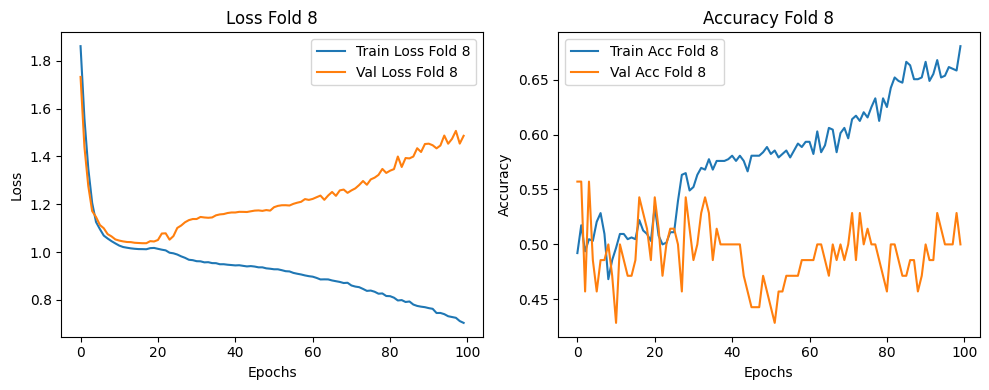

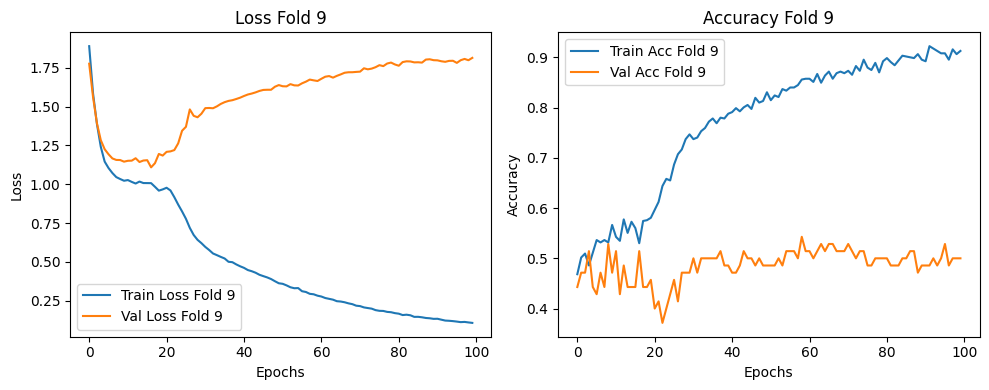

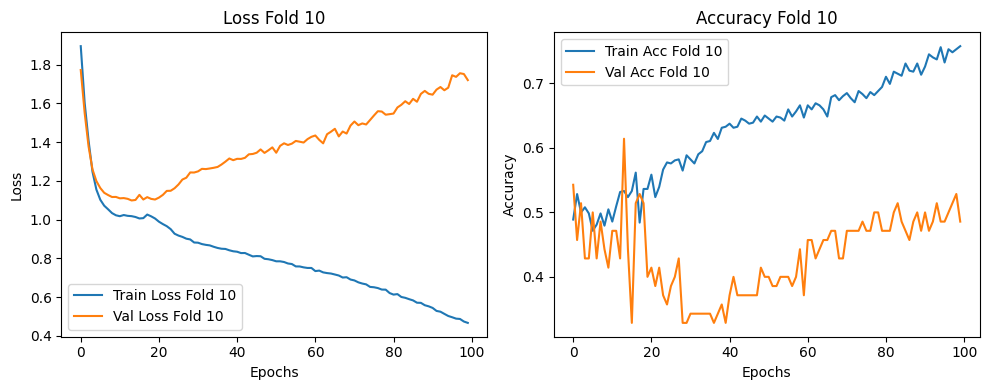

In [ ]:
# จำนวน folds ที่จะใช้
kf = KFold(n_splits=fold, shuffle=True, random_state=42)

fold_no = 1
val_acc_per_fold = []
val_loss_per_fold = []

# เก็บค่า loss และ accuracy แต่ละ fold
train_loss_all_folds = []
val_loss_all_folds = []
train_acc_all_folds = []
val_acc_all_folds = []

early_stopping = EarlyStopping(monitor='val_loss', patience=pat, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# เริ่มต้น cross-validation
for train_index, val_index in kf.split(x_train):
    print(f'Training fold {fold_no}...')

    # แบ่งข้อมูลฝึก (train) และข้อมูลทดสอบ (validation)
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Initialising the RNN model ใหม่ในแต่ละ fold
    model = Sequential()
    model.add(Bidirectional(LSTM(320, input_shape=(window_length, number_of_features), return_sequences=True)))
    model.add(Dropout(DP))
    model.add(Bidirectional(LSTM(240, return_sequences=True)))
    model.add(Dropout(DP))
    model.add(Bidirectional(LSTM(240, return_sequences=True)))
    model.add(Bidirectional(LSTM(240, return_sequences=False)))
    model.add(Dropout(DP))
    model.add(Dense(37, kernel_regularizer=regularizers.l1(L_REG)))
    model.add(Dense(number_of_features))

    model.compile(optimizer=Adam(learning_rate=learning), loss='mse', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train_fold, y_train_fold,
                        validation_data=(x_val_fold, y_val_fold),
                        batch_size=128,
                        epochs=epo,
                        callbacks=[early_stopping, reduce_lr],
                        verbose=2)

    # เก็บค่าของ validation loss และ accuracy
    val_acc_per_fold.append(history.history['val_accuracy'][-1])
    val_loss_per_fold.append(history.history['val_loss'][-1])

    # เก็บค่าของ training loss และ accuracy แต่ละ fold
    train_loss_all_folds.append(history.history['loss'])
    val_loss_all_folds.append(history.history['val_loss'])
    train_acc_all_folds.append(history.history['accuracy'])
    val_acc_all_folds.append(history.history['val_accuracy'])

    print(f"Fold {fold_no} - val_accuracy: {history.history['val_accuracy'][-1]} - val_loss: {history.history['val_loss'][-1]}")

    # เพิ่ม fold count
    fold_no += 1

# สรุปผลการ cross-validation
print(f'Average validation accuracy: {np.mean(val_acc_per_fold)}')
print(f'Average validation loss: {np.mean(val_loss_per_fold)}')

# พล็อตกราฟ train_loss vs val_loss สำหรับแต่ละ fold
for i in range(len(train_loss_all_folds)):
    plt.figure(figsize=(10, 4))

    # Plot for loss
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_all_folds[i], label=f'Train Loss Fold {i+1}')
    plt.plot(val_loss_all_folds[i], label=f'Val Loss Fold {i+1}')
    plt.title(f'Loss Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot for accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_all_folds[i], label=f'Train Acc Fold {i+1}')
    plt.plot(val_acc_all_folds[i], label=f'Val Acc Fold {i+1}')
    plt.title(f'Accuracy Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Predict new

In [ ]:
next_Date = '11/04/2023'
print('-' * 40)
print('Predict the Future Drawing on April 11, 2023')
next = df.copy()
next = next.tail((window_length))
next = np.array(next)
x_next = scaler.transform(next)
y_next_pred = model.predict(np.array([x_next]))
print('Drawing  Date', next_Date)
print('Prediction without rounding up or down:\t', scaler.inverse_transform(y_next_pred).astype(int)[0])
print('Prediction with rounding up           :\t', scaler.inverse_transform(y_next_pred).astype(int)[0]+1)
print('Prediction with rounding down         :\t', scaler.inverse_transform(y_next_pred).astype(int)[0]-1)
print('-' * 40)

----------------------------------------
Predict the Future Drawing on April 11, 2023
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
Drawing  Date 11/04/2023
Prediction without rounding up or down:	 [538  50]
Prediction with rounding up           :	 [539  51]
Prediction with rounding down         :	 [537  49]
----------------------------------------


### Predict the Future Drawing Results on June 1, 2o24

In [ ]:
next_Date = '2024-09-1'
print('-' * 40)
print('Predict the Future Drawing on',next_Date)

# Copy and prepare the data for prediction
next = df.copy()
next = next.tail(window_length)
next = np.array(next)
x_next = scaler.transform(next)

# Predict the next values
y_next_pred = model.predict(np.array([x_next]))

# Filter the actual values based on the next date
filtered_df = lt_2[lt_2['Date'] == next_Date]

# Extract the actual values and convert them to a list
actual_values = filtered_df[['top3', 'up2']].values.flatten().astype(int).tolist()

# Calculate the absolute difference
prediction = scaler.inverse_transform(y_next_pred).astype(int)[0].tolist()
diff = [abs(pred - actual) for pred, actual in zip(prediction, actual_values)]

# Print the results
print('Drawing  Date', next_Date)
print('Prediction:\t', prediction)
print('GoundTruth:\t', actual_values)
print('Diff:   \t', diff)
print('-' * 40)

----------------------------------------
Predict the Future Drawing on 2024-09-1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Drawing  Date 2024-09-1
Prediction:	 [497, 50]
GoundTruth:	 [606, 94]
Diff:   	 [109, 44]
----------------------------------------


# Evaluate

In [ ]:
evalu = {
    'รอบที่': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'บน': [420, 668, 448, 294, 281, 481, 288, 545, 542, 596],
    'ล่าง': [77, 66, 62, 53, 67, 65, 49, 84, 74, 64],
    'accuracy': [0.9626, 0.9482, 0.9626, 0.964, 0.9698, 0.9712, 0.954, 0.9583, 0.9727, 0.9482]
}

# Convert dictionary to DataFrame
evaluate = pd.DataFrame(evalu)

In [ ]:
df = evaluate.copy()

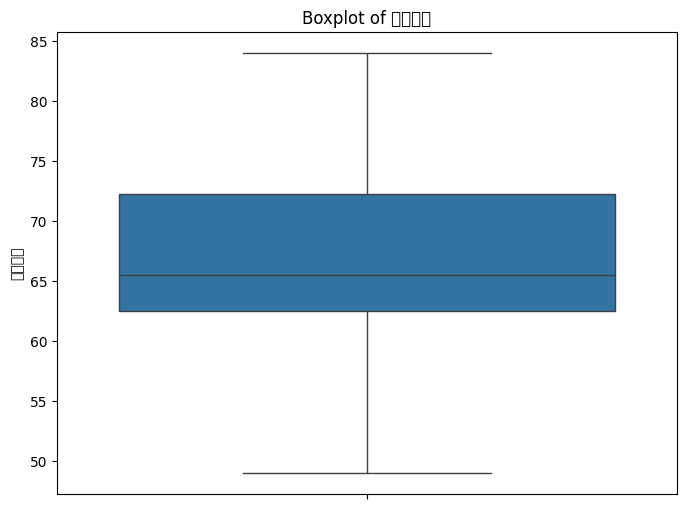

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=evaluate['ล่าง'])
plt.title('Boxplot of ล่าง')
plt.ylabel('ล่าง')
plt.show()

In [ ]:
# Calculate descriptive statistics
min_value = df['ล่าง'].min()
max_value = df['ล่าง'].max()
mean_value = df['ล่าง'].mean()
q1 = df['ล่าง'].quantile(0.25)
q2 = df['ล่าง'].median()
q3 = df['ล่าง'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Determine outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df['ล่าง'][(df['ล่าง'] < lower_bound) | (df['ล่าง'] > upper_bound)]

# Print the results
print(f'Min value: {min_value}')
print(f'Max value: {max_value}')
print(f'Mean value: {mean_value}')
print(f'Q1 (25th percentile): {q1}')
print(f'Q2 (median, 50th percentile): {q2}')
print(f'Q3 (75th percentile): {q3}')
print(f'Outliers: {outliers.values}')

Min value: 49
Max value: 84
Mean value: 66.1
Q1 (25th percentile): 62.5
Q2 (median, 50th percentile): 65.5
Q3 (75th percentile): 72.25
Outliers: []


In [ ]:
# Calculate descriptive statistics for 'บน'
min_value = df['บน'].min()
max_value = df['บน'].max()
mean_value = df['บน'].mean()
q1 = df['บน'].quantile(0.25)
q2 = df['บน'].median()
q3 = df['บน'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Determine outliers for 'บน'
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df['บน'][(df['บน'] < lower_bound) | (df['บน'] > upper_bound)]

# Print the results for 'บน'
print(f'Min value: {min_value}')
print(f'Max value: {max_value}')
print(f'Mean value: {mean_value}')
print(f'Q1 (25th percentile): {q1}')
print(f'Q2 (median, 50th percentile): {q2}')
print(f'Q3 (75th percentile): {q3}')
print(f'Outliers: {outliers.values}')

Min value: 281
Max value: 668
Mean value: 456.3
Q1 (25th percentile): 325.5
Q2 (median, 50th percentile): 464.5
Q3 (75th percentile): 544.25
Outliers: []


# tranformers

In [ ]:
fold = 10
L_REG = 0.001
pat = 180
epo = 200
learning = 0.001
DP = 0.02

In [ ]:
# from tensorflow.keras.layers import Input, Dense, Dropout, MultiHeadAttention, LayerNormalization, Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

# # เปลี่ยนจาก LSTM เป็น Transformer model
# def build_transformer_model(input_shape, number_of_features, L_REG, DP):
#     inputs = Input(shape=input_shape)

#     # Multi-Head Attention layer
#     attention_output = MultiHeadAttention(num_heads=8, key_dim=number_of_features)(inputs, inputs)
#     attention_output = LayerNormalization()(attention_output)

#     # Feed Forward Network
#     x = Dense(240, activation='relu', kernel_regularizer=regularizers.l1(L_REG))(attention_output)
#     x = Dropout(DP)(x)
#     x = Dense(240, activation='relu', kernel_regularizer=regularizers.l1(L_REG))(x)
#     x = Dropout(DP)(x)

#     # Output layer
#     outputs = Dense(number_of_features)(x)

#     model = Model(inputs, outputs)
#     model.compile(optimizer=Adam(learning_rate=learning), loss='mse', metrics=['accuracy'])
#     return model

# # cross-validation setup (เหมือนเดิม)
# kf = KFold(n_splits=fold, shuffle=True, random_state=42)

# fold_no = 1
# val_acc_per_fold = []
# val_loss_per_fold = []

# train_loss_all_folds = []
# val_loss_all_folds = []
# train_acc_all_folds = []
# val_acc_all_folds = []

# # เริ่มต้น cross-validation
# for train_index, val_index in kf.split(x_train):
#     print(f'Training fold {fold_no}...')

#     # แบ่งข้อมูลฝึก (train) และข้อมูลทดสอบ (validation)
#     x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
#     y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

#     # สร้าง Transformer model สำหรับแต่ละ fold
#     model = build_transformer_model((window_length, number_of_features), number_of_features, L_REG, DP)

#     # Train the model
#     history = model.fit(x_train_fold, y_train_fold,
#                         validation_data=(x_val_fold, y_val_fold),
#                         batch_size=128,
#                         epochs=epo,
#                         callbacks=[early_stopping, reduce_lr],
#                         verbose=2)

#     # เก็บค่าของ validation loss และ accuracy
#     val_acc_per_fold.append(history.history['val_accuracy'][-1])
#     val_loss_per_fold.append(history.history['val_loss'][-1])

#     # เก็บค่าของ training loss และ accuracy แต่ละ fold
#     train_loss_all_folds.append(history.history['loss'])
#     val_loss_all_folds.append(history.history['val_loss'])
#     train_acc_all_folds.append(history.history['accuracy'])
#     val_acc_all_folds.append(history.history['val_accuracy'])

#     print(f"Fold {fold_no} - val_accuracy: {history.history['val_accuracy'][-1]} - val_loss: {history.history['val_loss'][-1]}")

#     # เพิ่ม fold count
#     fold_no += 1

# # สรุปผลการ cross-validation
# print(f'Average validation accuracy: {np.mean(val_acc_per_fold)}')
# print(f'Average validation loss: {np.mean(val_loss_per_fold)}')

# # พล็อตกราฟ train_loss vs val_loss สำหรับแต่ละ fold
# for i in range(len(train_loss_all_folds)):
#     plt.figure(figsize=(10, 4))

#     # Plot for loss
#     plt.subplot(1, 2, 1)
#     plt.plot(train_loss_all_folds[i], label=f'Train Loss Fold {i+1}')
#     plt.plot(val_loss_all_folds[i], label=f'Val Loss Fold {i+1}')
#     plt.title(f'Loss Fold {i+1}')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()

#     # Plot for accuracy
#     plt.subplot(1, 2, 2)
#     plt.plot(train_acc_all_folds[i], label=f'Train Acc Fold {i+1}')
#     plt.plot(val_acc_all_folds[i], label=f'Val Acc Fold {i+1}')
#     plt.title(f'Accuracy Fold {i+1}')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.tight_layout()
#     plt.show()


### Prediction without rounding up or down the results

In [ ]:
print('-' * 40)
print('Prediction vs. GoundTruth without rounding up or down')
for i in range(1,10):
  test = df1.copy()
  test = test.tail((window_length+10-i))
  test = test.head((window_length+1))
  test_Date = df1.iloc[ (test.tail().index[-1]) ]['Date']
  test1 = test.head((window_length))
  test1.drop(['Date'], axis=1, inplace=True)
  test1 = np.array(test1)
  x_test = scaler.transform(test1)
  y_test_pred = model.predict(np.array([x_test]))
  y_test_true = test.drop(['Date'], axis=1, inplace=True)
  y_test_true = test.tail(1)
  print('Drawing  Date', test_Date)
  print('Prediction:\t', scaler.inverse_transform(y_test_pred).astype(int)[0])
  print('GoundTruth:\t', np.array(y_test_true)[0])
  print('-' * 40)

----------------------------------------
Prediction vs. GoundTruth without rounding up or down
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
Drawing  Date 1995-05-17 00:00:00
Prediction:	 [505  52]
GoundTruth:	 ['381' '55']
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Drawing  Date 1995-05-02 00:00:00
Prediction:	 [507  52]
GoundTruth:	 ['692' '88']
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Drawing  Date 1995-04-16 00:00:00
Prediction:	 [502  52]
GoundTruth:	 ['581' '99']
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Drawing  Date 1995-04-01 00:00:00
Prediction:	 [498  53]
GoundTruth:	 ['039' '06']
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Drawing  Date 1995-03-16 00:00:00
Prediction:	 [503  52]
GoundTruth:	 ['847' '67']
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Drawing  Date 1995-03-01 00:00:00
Prediction:	 [502  52]

### Prediction with rounding up the results

In [ ]:
print('-' * 40)
print('Prediction vs. GoundTruth with rounding up')
for i in range(1,10):
  test = df1.copy()
  test = test.tail((window_length+10-i))
  test = test.head((window_length+1))
  test_Date = df1.iloc[ (test.tail().index[-1]) ]['Date']
  test1 = test.head((window_length))
  test1.drop(['Date'], axis=1, inplace=True)
  test1 = np.array(test1)
  x_test = scaler.transform(test1)
  y_test_pred = model.predict(np.array([x_test]))
  y_test_true = test.drop(['Date'], axis=1, inplace=True)
  y_test_true = test.tail(1)
  print('Drawing  Date', test_Date)
  print('Prediction:\t', scaler.inverse_transform(y_test_pred).astype(int)[0]+1)
  print('GoundTruth:\t', np.array(y_test_true)[0])
  print('-' * 40)

----------------------------------------
Prediction vs. GoundTruth with rounding up
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Drawing  Date 1995-05-17 00:00:00
Prediction:	 [500  53]
GoundTruth:	 ['381' '55']
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Drawing  Date 1995-05-02 00:00:00
Prediction:	 [502  53]
GoundTruth:	 ['692' '88']
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Drawing  Date 1995-04-16 00:00:00
Prediction:	 [500  53]
GoundTruth:	 ['581' '99']
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Drawing  Date 1995-04-01 00:00:00
Prediction:	 [500  54]
GoundTruth:	 ['039' '06']
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Drawing  Date 1995-03-16 00:00:00
Prediction:	 [500  53]
GoundTruth:	 ['847' '67']
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Drawing  Date 1995-03-01 00:00:00
Prediction:	 [499  53]
GoundTruth: